In [ ]:
import cv2
import os
import random
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
ROOTDIR = '/dataset_path'
CATEGORIES = ['Akordion', 'Angklung', 'Kompang', 'Rebab']

In [ ]:
training_data = [] #Create an empty list for the training data
IMG_SIZE = 200 #Resize the image size to reduce computation

for category in CATEGORIES:
  directory = os.path.join(ROOTDIR, category)
  class_num = CATEGORIES.index(category)

  for filename in os.listdir(directory):
    try:
      img_arr = cv2.imread(os.path.join(directory, filename))
      new_im = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)) #Resize the image
      new_im = cv2.cvtColor(new_im, cv2.COLOR_BGR2RGB) #Convert the image color
      training_data.append([new_im, class_num])
    except Exception as e:
      pass

In [ ]:
random.shuffle(training_data)
print(len(training_data))

2000


In [ ]:
X_training = []  # Empy list to save the feature or the image data from the training data
y_training = []  # Empty list to save the labels from the training data

X_val = []
y_val = []

X_test = []
y_test = []

for features, label in training_data[400:1680]:
  X_training.append(features)  # Add the feature to the x
  y_training.append(label)     # Add the label to the y 


X_training = np.array(X_training).reshape(-1, IMG_SIZE, IMG_SIZE, 3)  #Reshape the x list to the size of the new image size
                                                    # The 1 on the last parameter is the image color channel or the image dimension

for features, label in training_data[1680:2000]:
  X_val.append(features)  # Add the feature to the x
  y_val.append(label)     # Add the label to the y 


X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

for features, label in training_data[:400]:
  X_test.append(features)  # Add the feature to the x
  y_test.append(label)     # Add the label to the y 


X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(len(X_training))
print(len(X_val))
print(len(X_test))

1280
320
400


In [ ]:
#Save the training data using numpy

np.save('drive/My Drive/dataset_hasil_video/Features1.npy', X_training)
np.save('drive/My Drive/dataset_hasil_video/Labels1.npy', y_training)

np.save('drive/My Drive/dataset_hasil_video/Featuresv1.npy', X_val)
np.save('drive/My Drive/dataset_hasil_video/Labelsv1.npy', y_val)

np.save('drive/My Drive/dataset_hasil_video/Featurest1.npy', X_test)
np.save('drive/My Drive/dataset_hasil_video/Labelst1.npy', y_test)
#X = np.load(features.npy) to load the features back

In [ ]:
xs1 = np.load('drive/My Drive/dataset_hasil_video/Features1.npy')
ys1 = np.load('drive/My Drive/dataset_hasil_video/Labels1.npy')

xv1 = np.load('drive/My Drive/dataset_hasil_video/Featuresv1.npy')
yv1 = np.load('drive/My Drive/dataset_hasil_video/Labelsv1.npy')

xt1 = np.load('drive/My Drive/dataset_hasil_video/Featurest1.npy')
yt1 = np.load('drive/My Drive/dataset_hasil_video/Labelst1.npy')


print(xs1.shape)
print(xv1.shape)
print(xt1.shape)

(1280, 200, 200, 3)
(320, 200, 200, 3)
(400, 200, 200, 3)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), input_shape = (200, 200, 3), activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  
  tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [ ]:
history = model.fit(xs1, ys1, validation_data=(xv1, yv1), epochs=15)

Epoch 1/15
40/40 [==============================] - 34s 830ms/step - loss: 452.3087 - accuracy: 0.4870 - val_loss: 0.5646 - val_accuracy: 0.9187
Epoch 2/15
40/40 [==============================] - 33s 839ms/step - loss: 0.3708 - accuracy: 0.9264 - val_loss: 0.2355 - val_accuracy: 0.9625
Epoch 3/15
40/40 [==============================] - 33s 826ms/step - loss: 0.1485 - accuracy: 0.9664 - val_loss: 0.1727 - val_accuracy: 0.9750
Epoch 4/15
40/40 [==============================] - 33s 829ms/step - loss: 0.0481 - accuracy: 0.9871 - val_loss: 0.1260 - val_accuracy: 0.9750
Epoch 5/15
40/40 [==============================] - 33s 823ms/step - loss: 0.0184 - accuracy: 0.9974 - val_loss: 0.0573 - val_accuracy: 0.9875
Epoch 6/15
40/40 [==============================] - 33s 823ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0475 - val_accuracy: 0.9906
Epoch 7/15
40/40 [==============================] - 34s 839ms/step - loss: 0.0059 - accuracy: 0.9993 - val_loss: 0.0516 - val_accuracy: 0.99

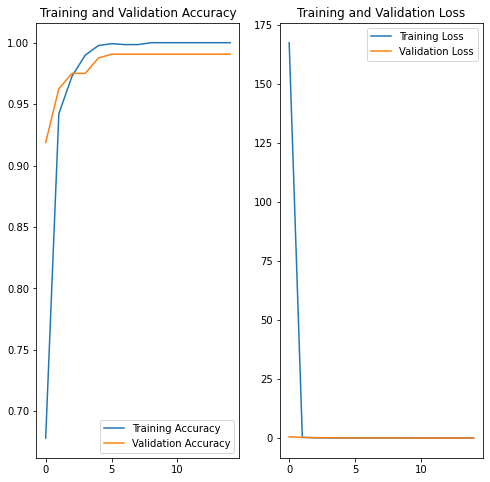

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('MIC.h5')